In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
data=pd.read_excel('/content/sample.xlsx')

In [57]:
data.head()

,text,label
0,"A person is at a diner, ordering an omelette.",0
1,"A person is outdoors, on a horse.",1
2,There are children present,1
3,The kids are frowning,0
4,The boy skates down the sidewalk.,0


In [58]:
data.value_counts('label')

label
0    183966
1    183407
dtype: int64

<Axes: xlabel='label', ylabel='count'>

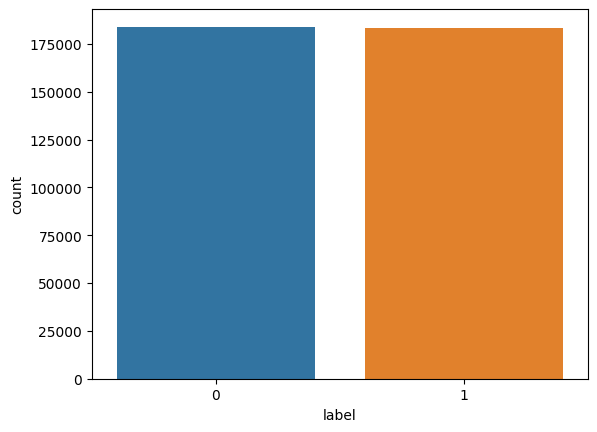

In [59]:
sns.countplot(data=data, x='label')

In [60]:
# Now applying the feature engineering

In [69]:
X=data['text']
y=data['label']

In [62]:
X.head()

0    A person is at a diner, ordering an omelette.
1                A person is outdoors, on a horse.
2                       There are children present
3                            The kids are frowning
4                The boy skates down the sidewalk.
Name: text, dtype: object

In [63]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [73]:

import re

def preprocessing_text(data):
    # Convert to string
    data = str(data)
    # Lowercase the text
    data = data.lower()
    # Remove punctuation marks and underscores
    data = re.sub(r'[^\w\s]', '', data.replace('_', ''))
    return data

X = X.apply(preprocessing_text)


In [74]:
X=X.apply(preprocessing_text)

In [75]:
X.head()

0    a person is at a diner ordering an omelette
1                a person is outdoors on a horse
2                     there are children present
3                          the kids are frowning
4               the boy skates down the sidewalk
Name: text, dtype: object

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [78]:
X_train=vectorizer.fit_transform(X_train) #We always fit&transform the "training" dataset and only "transform" the test dataset
X_test=vectorizer.transform(X_test)

# MODEL-1 - Passive Aggressive Classifier


In [79]:
from sklearn.linear_model import PassiveAggressiveClassifier
model1=PassiveAggressiveClassifier()

In [80]:
model1.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [81]:
y_pred=model1.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69     43731
           1       0.72      0.68      0.70     48113

    accuracy                           0.69     91844
   macro avg       0.69      0.69      0.69     91844
weighted avg       0.69      0.69      0.69     91844



In [84]:
sample_text1=["Two women are at a restaurant drinking wine."]
y_pred1=model1.predict(vectorizer.transform(sample_text1))
if y_pred1==0:
  print('Not Plagiarised')
else:
  print("Plagiarised Content")

Not Plagiarised


In [88]:
sample_text1=["There is one man in the picture.Findlaw Products is here.Plagiarism is rampant on the internet and in the classroom. With so much content out there, it’s sometimes hard to know when something has been plagiarized. Authors writing blog posts may want to check if someone has stolen their work and posted it elsewhere. Teachers may want to check students’ papers against other scholarly articles for copied work. News outlets may want to check if a content farm has stolen their news articles and claimed the content as its own. So, how do we guard against plagiarism? Wouldn’t it be nice if we could have software do the heavy lifting for us? Using machine learning, we can build our own plagiarism checker that searches a vast database for stolen content. In this article, we’ll do exactly that. We’ll build a Python Flask app that uses Pinecone — a similarity search service — to find possibly plagiarized content."]
y_pred1=model1.predict(vectorizer.transform(sample_text1))
if y_pred1==0:
  print('Not Plagiarised')
else:
  print("Plagiarised Content")

Not Plagiarised


In [89]:
sample_text2=["There is one man in the picture"]
y_pred2=model1.predict(vectorizer.transform(sample_text2))
if y_pred2==0:
  print('Not Plagiarised')
else:
  print("Plagiarised Content")


Plagiarised Content


# MODEL 2- Support Vector Machine